Problem description:
<br>
Predicting whether a customer will change telecommunications provider, something known as "churning".
<br>
Dataset info:
<br>
The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

- "state", string. 2-letter code of the US state of customer residence
- "account_length", numerical. Number of months the customer has been with the current telco provider
- "area_code", string="area_code_AAA" where AAA = 3 digit area code.
- "international_plan", (yes/no). The customer has international plan.
- "voice_mail_plan", (yes/no). The customer has voice mail plan.
- "number_vmail_messages", numerical. Number of voice-mail messages.
- "total_day_minutes", numerical. Total minutes of day calls.
- "total_day_calls", numerical. Total minutes of day calls.
- "total_day_charge", numerical. Total charge of day calls.
- "total_eve_minutes", numerical. Total minutes of evening calls.
- "total_eve_calls", numerical. Total number of evening calls.
- "total_eve_charge", numerical. Total charge of evening calls.
- "total_night_minutes", numerical. Total minutes of night calls.
- "total_night_calls", numerical. Total number of night calls.
- "total_night_charge", numerical. Total charge of night calls.
- "total_intl_minutes", numerical. Total minutes of international calls.
- "total_intl_calls", numerical. Total number of international calls.
- "total_intl_charge", numerical. Total charge of international calls
- "number_customer_service_calls", numerical. Number of calls to customer service
- "churn", (yes/no). Customer churn - target variable.


Your task is to : 
  1. Use some EDA techniques we learned this week   
  2. Using Univariate variable analysis: 
    Hint : use dataframe['feature'].unique()
  3. Fix the problems on the features above 
      - hint : Use df.replace from pandas, and df.apply
  4. Detect skewed distribution on a numeric variable :
      - Use log/sqrt transformation on at least one variable with skewed distribution
      - hint : use np.log() or np.sqrt()
  5. Detect missing values and handle them

  6. Use Catboost Encoding (Count Encoding, Target Encoding) and compare the performance with One-Hot Encoding
  
  7. Scale the numeric data (some of them)
  
  8. Make train/test split : with train(70%), test(30%) with random_state = 0

  9. Train the model
  
  10. Evaluate the model
  
  11. Achieve accuracy on test set >=0.90
  
  12. For reproducibility please use random_state on train_test_split and model initialization
  
  13. Write a summary :
    - Which model gives the best result?
    - What can we improve in the future?
    - Which encoding give better performance on this dataset (CatBoost or One-Hot)?
    
Bonus points : 
* Add precision/recall evaluation

* Hint : use:  from sklearn.metrics import classification_report

----------------------------
General Support : 
For converting feature to numeric value use :
pd.to_numeric(dataset[feature], errors='coerce')

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('dataset-workshop2.csv')

In [4]:
dataset.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
dataset.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns:")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print("----------------------------------")        
print("Category columns:")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)

Numeric columns:
account_length
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls
----------------------------------
Category columns:
state
area_code
international_plan
voice_mail_plan
churn


In [8]:
# Categorical features
categorical_features=[]
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        categorical_features.append(column)

print(categorical_features)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


In [9]:
# Numerical features
numerical_features = []
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        numerical_features.append(column)
print(numerical_features)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [10]:
cat_df = dataset[categorical_features]
num_df = dataset[numerical_features]

In [11]:
cat_df.head(5)

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


In [12]:
num_df.head(5)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [13]:
for cols in cat_df.columns:
    print(f'Number of unique values for: {cols}= {cat_df[cols].nunique()}')
    print(cat_df[cols].unique())
    print('----------------------------')

Number of unique values for: state= 51
['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
----------------------------
Number of unique values for: area_code= 3
['area_code_415' 'area_code_408' 'area_code_510']
----------------------------
Number of unique values for: international_plan= 2
['no' 'yes']
----------------------------
Number of unique values for: voice_mail_plan= 2
['yes' 'no']
----------------------------
Number of unique values for: churn= 2
['no' 'yes']
----------------------------


### Bivariate Analysis

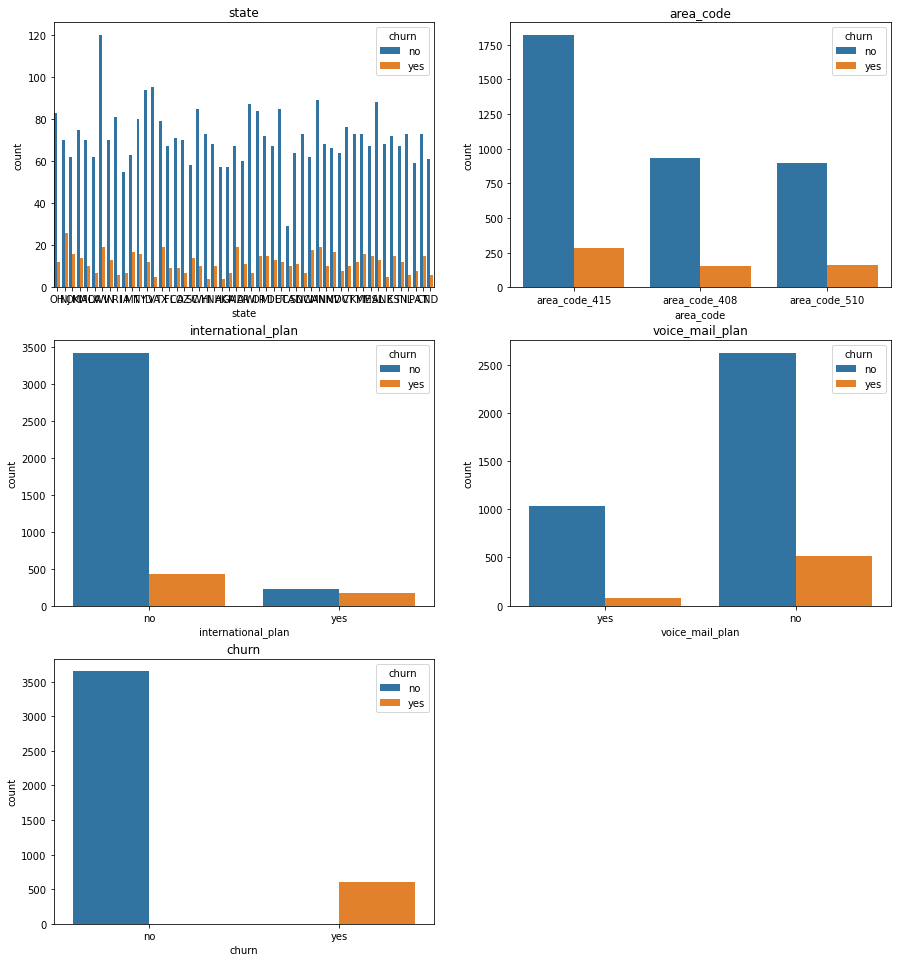

In [14]:
#note:
#generate subplot for all of them
import matplotlib.pyplot as plt
import seaborn as sns
a = 7 # number of rows
b = 2 # number of columns in a row
c = 1 # initialize plot counter

fig = plt.figure(figsize=(15,40))

for feature in cat_df.columns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(feature))
    plt.xlabel(feature)
    sns.countplot(cat_df[feature], hue=dataset['churn'])
    c = c +1
    
plt.show()   

In [15]:
pd.crosstab(dataset['churn'],dataset['state']).transpose()

churn,no,yes
state,,
AK,57,4
AL,88,13
AR,60,11
AZ,70,7
CA,29,10
CO,71,9
CT,73,15
DC,64,8
DE,67,13


In [16]:
dataset.groupby(['churn', 'international_plan']).size()

churn  international_plan
no     no                    3423
       yes                    229
yes    no                     431
       yes                    167
dtype: int64

In [17]:
dataset['churn'].value_counts()

# very imbalanced target class

no     3652
yes     598
Name: churn, dtype: int64

In [18]:
num_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


<AxesSubplot:xlabel='number_vmail_messages', ylabel='Density'>

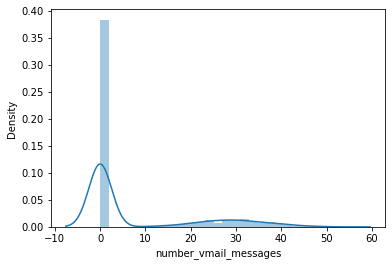

In [19]:
sns.distplot(dataset['number_vmail_messages'])

In [20]:
dataset['number_vmail_messages'].unique()

array([26,  0, 24, 37, 27, 33, 39, 25, 30, 41, 28, 34, 46, 29, 35, 21, 42,
       22, 36, 23, 43, 31, 38, 40, 32, 48, 18, 17, 45, 16, 20, 14, 19, 15,
       11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  6, 52], dtype=int64)

ValueError: cannot convert float NaN to integer

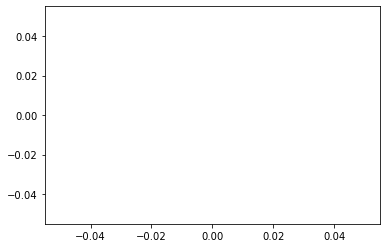

In [21]:
# Converting age to log in order to normalize a bit

dataset['number_vmail_messages_log'] = np.log(dataset['number_vmail_messages'])
sns.distplot(dataset['number_vmail_messages_log'])

In [22]:
dataset['number_vmail_messages_log'].unique()

array([3.25809654,       -inf, 3.17805383, 3.61091791, 3.29583687,
       3.49650756, 3.66356165, 3.21887582, 3.40119738, 3.71357207,
       3.33220451, 3.52636052, 3.8286414 , 3.36729583, 3.55534806,
       3.04452244, 3.73766962, 3.09104245, 3.58351894, 3.13549422,
       3.76120012, 3.4339872 , 3.63758616, 3.68887945, 3.4657359 ,
       3.87120101, 2.89037176, 2.83321334, 3.80666249, 2.77258872,
       2.99573227, 2.63905733, 2.94443898, 2.7080502 , 2.39789527,
       2.48490665, 3.8501476 , 2.07944154, 3.78418963, 3.8918203 ,
       1.38629436, 2.30258509, 2.56494936, 3.91202301, 1.79175947,
       3.95124372])

In [23]:
dataset.replace([np.inf, -np.inf], 0, inplace=True)

In [24]:
dataset['number_vmail_messages_log'].dtype

dtype('float64')

In [25]:
dataset['number_vmail_messages'].dtype

dtype('int64')

In [26]:
dataset.number_vmail_messages.astype(float)

0       26.0
1        0.0
2        0.0
3        0.0
4       24.0
        ... 
4245     0.0
4246     0.0
4247     0.0
4248    40.0
4249    34.0
Name: number_vmail_messages, Length: 4250, dtype: float64

In [27]:
dataset['number_vmail_messages'].dtype

dtype('int64')

In [28]:
dataset['number_vmail_messages'].unique()

array([26,  0, 24, 37, 27, 33, 39, 25, 30, 41, 28, 34, 46, 29, 35, 21, 42,
       22, 36, 23, 43, 31, 38, 40, 32, 48, 18, 17, 45, 16, 20, 14, 19, 15,
       11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  6, 52], dtype=int64)

In [29]:
dataset['number_vmail_messages_log'].unique()

array([3.25809654, 0.        , 3.17805383, 3.61091791, 3.29583687,
       3.49650756, 3.66356165, 3.21887582, 3.40119738, 3.71357207,
       3.33220451, 3.52636052, 3.8286414 , 3.36729583, 3.55534806,
       3.04452244, 3.73766962, 3.09104245, 3.58351894, 3.13549422,
       3.76120012, 3.4339872 , 3.63758616, 3.68887945, 3.4657359 ,
       3.87120101, 2.89037176, 2.83321334, 3.80666249, 2.77258872,
       2.99573227, 2.63905733, 2.94443898, 2.7080502 , 2.39789527,
       2.48490665, 3.8501476 , 2.07944154, 3.78418963, 3.8918203 ,
       1.38629436, 2.30258509, 2.56494936, 3.91202301, 1.79175947,
       3.95124372])

In [30]:
print("Numeric columns:")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)

Numeric columns:
account_length
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls
number_vmail_messages_log


In [31]:
# Scaling the data

def minmax(frame):
    scaler = MinMaxScaler()
    frame[frame.columns] = scaler.fit_transform(frame[frame.columns])
    
    return frame

In [32]:
from sklearn.preprocessing import StandardScaler

minmax_scaler = StandardScaler() 
dataset[['account_length', 'number_vmail_messages', 'total_day_minutes','total_day_calls','total_day_charge',
        'total_eve_minutes','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes',
        'total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge']] = minmax_scaler.fit_transform(dataset[['account_length', 'number_vmail_messages', 'total_day_minutes','total_day_calls','total_day_charge',
        'total_eve_minutes','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes',
        'total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge']].values)
dataset[['account_length', 'number_vmail_messages', 'total_day_minutes','total_day_calls','total_day_charge',
        'total_eve_minutes','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes',
        'total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge']]

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,0.170399,1.366857,-0.345510,1.163449,-0.345788,-0.093025,-0.093025,0.141841,-0.092493,1.070003,0.157309,1.070820,1.247901,-0.579164,1.248591
1,0.926186,-0.567911,1.169136,0.710014,1.169295,-1.571820,-1.571820,0.493490,-1.572341,-0.753320,0.207083,-0.752053,0.704379,0.232927,0.698342
2,-0.409038,-0.567911,2.206058,-1.456398,2.206218,-2.752070,-2.752070,-0.611691,-2.752473,-0.072057,-0.539526,-0.072337,-1.324770,1.045017,-1.328187
3,-0.635774,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,-1.032448,1.096316,-1.031447,-0.270676,1.053239,-0.270956,-0.056552,-0.579164,-0.053219
4,0.523099,1.218029,0.702522,-0.599910,0.702027,2.952139,2.952139,0.393019,2.951497,0.239775,0.903917,0.241038,-0.998657,1.045017,-0.992669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.434231,-0.567911,0.148880,-1.506780,0.148711,0.868291,0.868291,-0.611691,0.867535,0.261623,-1.037264,0.263106,0.015918,0.638972,0.013885
4246,-0.686160,-0.567911,-0.043691,-0.549528,-0.044078,-1.372790,-1.372790,-0.913104,-1.373311,-0.284579,-0.539526,-0.284197,0.450735,0.638972,0.456769
4247,-0.635774,-0.567911,-0.177010,0.055052,-0.176961,-0.140792,-0.140792,1.297257,-0.141665,-1.418694,0.207083,-1.418526,-1.216066,1.045017,-1.220821
4248,-1.265596,2.408655,1.026560,1.364976,1.026609,0.454308,0.454308,1.297257,0.455425,1.926052,0.804369,1.927084,-0.129022,0.232927,-0.133743


In [33]:
cat_df = dataset[categorical_features]

In [34]:
def one_hot_encoding(dataset, columns):
    ds_new = dataset.copy()
    data_dummies =  pd.get_dummies(dataset[columns])
    dataset_new = pd.concat([ds_new, data_dummies],  axis='columns')
    dataset_new.drop(columns, axis='columns', inplace=True)

    return dataset_new


In [36]:
cat_df

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no
...,...,...,...,...,...
4245,MT,area_code_415,no,no,no
4246,WV,area_code_408,no,no,no
4247,NC,area_code_408,no,no,no
4248,HI,area_code_408,no,yes,no


In [37]:
dataset['churn'].replace({'no':0,'yes':1}, inplace=True)

In [40]:
from sklearn.preprocessing import OneHotEncoder
dataset_one_hot = one_hot_encoding(dataset, ['international_plan','voice_mail_plan'])
dataset_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   float64
 2   area_code                      4250 non-null   object 
 3   number_vmail_messages          4250 non-null   float64
 4   total_day_minutes              4250 non-null   float64
 5   total_day_calls                4250 non-null   float64
 6   total_day_charge               4250 non-null   float64
 7   total_eve_minutes              4250 non-null   float64
 8   total_eve_calls                4250 non-null   float64
 9   total_eve_charge               4250 non-null   float64
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   float64
 12  total_night_charge             4250 non-null   f

In [41]:
dataset_one_hot

,state,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,number_vmail_messages_log,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,OH,0.170399,area_code_415,1.366857,-0.345510,1.163449,-0.345788,-0.093025,0.141841,-0.092493,...,1.247901,-0.579164,1.248591,1,0,3.258097,1,0,0,1
1,NJ,0.926186,area_code_415,-0.567911,1.169136,0.710014,1.169295,-1.571820,0.493490,-1.572341,...,0.704379,0.232927,0.698342,0,0,0.000000,1,0,1,0
2,OH,-0.409038,area_code_408,-0.567911,2.206058,-1.456398,2.206218,-2.752070,-0.611691,-2.752473,...,-1.324770,1.045017,-1.328187,2,0,0.000000,0,1,1,0
3,OK,-0.635774,area_code_415,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,1.096316,-1.031447,...,-0.056552,-0.579164,-0.053219,3,0,0.000000,0,1,1,0
4,MA,0.523099,area_code_510,1.218029,0.702522,-0.599910,0.702027,2.952139,0.393019,2.951497,...,-0.998657,1.045017,-0.992669,3,0,3.178054,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,-0.434231,area_code_415,-0.567911,0.148880,-1.506780,0.148711,0.868291,-0.611691,0.867535,...,0.015918,0.638972,0.013885,0,0,0.000000,1,0,1,0
4246,WV,-0.686160,area_code_408,-0.567911,-0.043691,-0.549528,-0.044078,-1.372790,-0.913104,-1.373311,...,0.450735,0.638972,0.456769,3,0,0.000000,1,0,1,0
4247,NC,-0.635774,area_code_408,-0.567911,-0.177010,0.055052,-0.176961,-0.140792,1.297257,-0.141665,...,-1.216066,1.045017,-1.220821,1,0,0.000000,1,0,1,0
4248,HI,-1.265596,area_code_408,2.408655,1.026560,1.364976,1.026609,0.454308,1.297257,0.455425,...,-0.129022,0.232927,-0.133743,2,0,3.688879,1,0,0,1


In [42]:
dataset = dataset_one_hot.copy()

In [43]:
import category_encoders as ce

def target_encoding(dataset, columns, y):
    ds_new = dataset.copy()
    target_encoders = ce.TargetEncoder(cols = columns)
    data_target = target_encoders.fit_transform(dataset[columns], y).add_suffix('_tar_enc')
    dataset_new = pd.concat([ds_new, data_target],  axis='columns')
    dataset_new.drop(columns, axis='columns', inplace=True)

    return dataset_new

In [51]:
cat = ['state', 'area_code']
dataset_target = target_encoding(dataset, cat, y=dataset['churn'])
dataset_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   float64
 1   number_vmail_messages          4250 non-null   float64
 2   total_day_minutes              4250 non-null   float64
 3   total_day_calls                4250 non-null   float64
 4   total_day_charge               4250 non-null   float64
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   float64
 7   total_eve_charge               4250 non-null   float64
 8   total_night_minutes            4250 non-null   float64
 9   total_night_calls              4250 non-null   float64
 10  total_night_charge             4250 non-null   float64
 11  total_intl_minutes             4250 non-null   float64
 12  total_intl_calls               4250 non-null   f

In [52]:
dataset_target

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,number_customer_service_calls,churn,number_vmail_messages_log,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,state_tar_enc,area_code_tar_enc
0,0.170399,1.366857,-0.345510,1.163449,-0.345788,-0.093025,0.141841,-0.092493,1.070003,0.157309,...,1.248591,1,0,3.258097,1,0,0,1,0.126316,0.136148
1,0.926186,-0.567911,1.169136,0.710014,1.169295,-1.571820,0.493490,-1.572341,-0.753320,0.207083,...,0.698342,0,0,0.000000,1,0,1,0,0.270833,0.136148
2,-0.409038,-0.567911,2.206058,-1.456398,2.206218,-2.752070,-0.611691,-2.752473,-0.072057,-0.539526,...,-1.328187,2,0,0.000000,0,1,1,0,0.126316,0.139963
3,-0.635774,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,1.096316,-1.031447,-0.270676,1.053239,...,-0.053219,3,0,0.000000,0,1,1,0,0.205128,0.136148
4,0.523099,1.218029,0.702522,-0.599910,0.702027,2.952139,0.393019,2.951497,0.239775,0.903917,...,-0.992669,3,0,3.178054,1,0,0,1,0.157303,0.150568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.434231,-0.567911,0.148880,-1.506780,0.148711,0.868291,-0.611691,0.867535,0.261623,-1.037264,...,0.013885,0,0,0.000000,1,0,1,0,0.212500,0.136148
4246,-0.686160,-0.567911,-0.043691,-0.549528,-0.044078,-1.372790,-0.913104,-1.373311,-0.284579,-0.539526,...,0.456769,3,0,0.000000,1,0,1,0,0.136691,0.139963
4247,-0.635774,-0.567911,-0.177010,0.055052,-0.176961,-0.140792,1.297257,-0.141665,-1.418694,0.207083,...,-1.220821,1,0,0.000000,1,0,1,0,0.087500,0.139963
4248,-1.265596,2.408655,1.026560,1.364976,1.026609,0.454308,1.297257,0.455425,1.926052,0.804369,...,-0.133743,2,0,3.688879,1,0,0,1,0.051948,0.139963


In [54]:
dataset = dataset_target.copy()

In [55]:
dataset.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,number_customer_service_calls,churn,number_vmail_messages_log,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,state_tar_enc,area_code_tar_enc
0,0.170399,1.366857,-0.345510,1.163449,-0.345788,-0.093025,0.141841,-0.092493,1.070003,0.157309,...,1.248591,1,0,3.258097,1,0,0,1,0.126316,0.136148
1,0.926186,-0.567911,1.169136,0.710014,1.169295,-1.571820,0.493490,-1.572341,-0.753320,0.207083,...,0.698342,0,0,0.000000,1,0,1,0,0.270833,0.136148
2,-0.409038,-0.567911,2.206058,-1.456398,2.206218,-2.752070,-0.611691,-2.752473,-0.072057,-0.539526,...,-1.328187,2,0,0.000000,0,1,1,0,0.126316,0.139963
3,-0.635774,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,1.096316,-1.031447,-0.270676,1.053239,...,-0.053219,3,0,0.000000,0,1,1,0,0.205128,0.136148
4,0.523099,1.218029,0.702522,-0.599910,0.702027,2.952139,0.393019,2.951497,0.239775,0.903917,...,-0.992669,3,0,3.178054,1,0,0,1,0.157303,0.150568


### Modelling and Evaluation

In [56]:
X = dataset.drop(columns = ["churn"])
y = dataset["churn"]

#### Random Forest

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# For computing accuracy score
from sklearn.metrics import accuracy_score,f1_score,precision_score,precision_recall_curve,PrecisionRecallDisplay,auc
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,RocCurveDisplay,roc_auc_score,roc_curve

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [59]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [60]:
y_pred = rf_clf.predict(X_test)

In [61]:
rf_score = accuracy_score(y_test, y_pred)

In [62]:
# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy',rf_accuracy,'%')

--------------------------------------------------------------------------------
Accuracy 96.39 %


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1102
           1       0.98      0.75      0.85       173

    accuracy                           0.96      1275
   macro avg       0.97      0.87      0.91      1275
weighted avg       0.96      0.96      0.96      1275



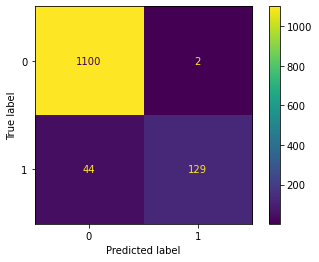

In [64]:
plot_confusion_matrix(rf_clf,
                     X_test,
                     y_test)

#### Decision Tree

In [65]:
# Fit
# Import model
from sklearn.tree import DecisionTreeClassifier

# Create model object
dtree = DecisionTreeClassifier()

# Fit to training sets
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
# Predict
y_pred_dtree = dtree.predict(X_test)

In [67]:
# Score It
print('Decision Tree')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree))

# Classification Report
print('--'*40)
print('Classification Report',classification_report(y_test, y_pred_dtree))

# Accuracy
print('--'*40)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')

Decision Tree


Confusion Matrix
[[1058   44]
 [  45  128]]
--------------------------------------------------------------------------------
Classification Report               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1102
           1       0.74      0.74      0.74       173

    accuracy                           0.93      1275
   macro avg       0.85      0.85      0.85      1275
weighted avg       0.93      0.93      0.93      1275

--------------------------------------------------------------------------------
Accuracy 93.02 %


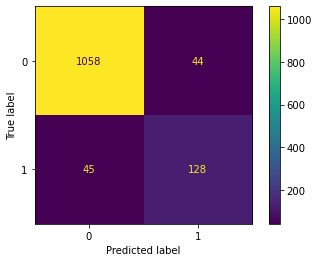

In [69]:
plot_confusion_matrix(dtree,
                     X_test,
                     y_test)

#### Support vector classifier

In [70]:
# Fit
# Import model
from sklearn.svm import SVC

# Instantiate the model
svc = SVC()

# Fit the model on training data
svc.fit(X_train, y_train)

SVC()

In [71]:
# Predict
y_pred_svc = svc.predict(X_test)

In [72]:
# Score It
from sklearn.metrics import classification_report, accuracy_score

print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*40)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*40)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,2)
print('Accuracy', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[1094    8]
 [  90   83]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1102
           1       0.91      0.48      0.63       173

    accuracy                           0.92      1275
   macro avg       0.92      0.74      0.79      1275
weighted avg       0.92      0.92      0.91      1275

--------------------------------------------------------------------------------
Accuracy 92.31 %


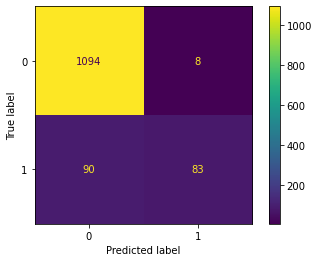

In [73]:
plot_confusion_matrix(svc,
                     X_test,
                     y_test)

#### Kernel SVC

In [74]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

In [75]:
# Fit
# Import model
from sklearn.svm import SVC

# Instantiate model object
ksvc= SVC(kernel = 'rbf', random_state = 0)

# Fit on training data
ksvc.fit(x_train_sc, y_train)

SVC(random_state=0)

In [76]:
# Predict
y_pred_ksvc = ksvc.predict(x_test_sc)

In [77]:
# Score it
print('Kernel SVC')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_ksvc))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_ksvc))

# Accuracy
print('--'*40)
ksvc_accuracy = round(accuracy_score(y_test,y_pred_ksvc)*100,1)
print('Accuracy',ksvc_accuracy,'%')

Kernel SVC


Confusion Matrix
[[1090   12]
 [  78   95]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1102
           1       0.89      0.55      0.68       173

    accuracy                           0.93      1275
   macro avg       0.91      0.77      0.82      1275
weighted avg       0.93      0.93      0.92      1275

--------------------------------------------------------------------------------
Accuracy 92.9 %


#### K-neareast neighbour

In [78]:
from sklearn.neighbors import KNeighborsClassifier
# Fit KNN
# Create model object
knn = KNeighborsClassifier()

# Fit new KNN on training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
# Predict new KNN
y_pred_knn_op = knn.predict(X_test)

In [80]:
# Accuracy
print('--'*40)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,2)
print('Accuracy',knn_op_accuracy,'%')

--------------------------------------------------------------------------------
Accuracy 89.88 %


### Summary

In [81]:
models = pd.DataFrame({
     'Model': [ 'Random Forest','Decision Tree', 'SVM', 'Kernel SVC', 
               'K-Nearest Neighbors'],
    'Score': [rf_accuracy, dtree_accuracy, 
               svc_accuracy, ksvc_accuracy, knn_op_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,96.39
1,Decision Tree,93.02
3,Kernel SVC,92.90
2,SVM,92.31
4,K-Nearest Neighbors,89.88


After analyzing the data, using visualization and compare different machine learning models based on accuracy, it is found that Random Forest work efficiently for this dataset with accuracy almost 96%.